TITLE: Handwritten Digit Recognition using Random Forest Classifier

OBJECTIVE: The objective of this project is to build a machine learning model for recognizing handwritten digits using the Random Forest Classifier algorithm. The model will be trained on the digits dataset and evaluated on a test set.

DATA SOURCE: The digits dataset is a built-in dataset in scikit-learn, which contains 1,797 images of handwritten digits (0-9). Each image is 8x8 pixels in size.


   Movie_ID      Movie_Title                       Movie_Genre Movie_Language  \
0         1       Four Rooms                      Crime Comedy             en   
1         2        Star Wars  Adventure Action Science Fiction             en   
2         3     Finding Nemo                  Animation Family             en   
3         4     Forrest Gump              Comedy Drama Romance             en   
4         5  American Beauty                             Drama             en   

   Movie_Budget  Movie_Popularity Movie_Release_Date  Movie_Revenue  \
0       4000000         22.876230         09-12-1995        4300000   
1      11000000        126.393695         25-05-1977      775398007   
2      94000000         85.688789         30-05-2003      940335536   
3      55000000        138.133331         06-07-1994      677945399   
4      15000000         80.878605         15-09-1999      356296601   

   Movie_Runtime  Movie_Vote  ...  \
0           98.0         6.5  ...   
1          1

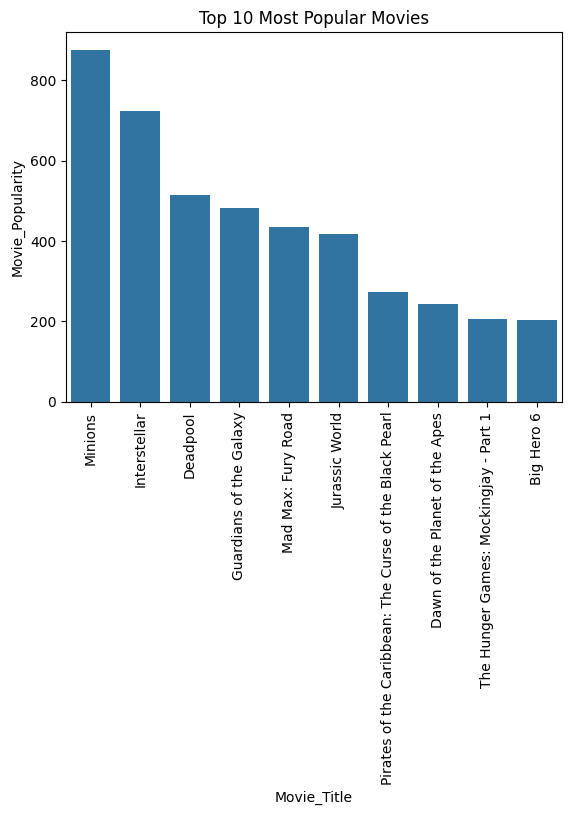

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Dataset
file_path = 'Movies Recommendation.csv'
movies_df = pd.read_csv(file_path)

# Display dataset sample
print(movies_df.head())

# Step 2: Data Preprocessing
# Simulating user interactions (if userId is not present)
if 'userId' not in movies_df.columns:
    np.random.seed(42)
    movies_df['userId'] = np.random.randint(1, 1001, size=len(movies_df))

# Keep necessary columns for recommendation
ratings_df = movies_df[['userId', 'Movie_ID', 'Movie_Vote']]
ratings_pivot = ratings_df.pivot_table(index='userId', columns='Movie_ID', values='Movie_Vote').fillna(0)

# Step 3: Build and Train KNN Model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(ratings_pivot)

# Step 4: Recommend Movies for a User
def get_movie_recommendations(user_id, num_recommendations=5):
    if user_id not in ratings_pivot.index:
        print("User ID not found!")
        return pd.DataFrame()
    
    user_vector = ratings_pivot.loc[user_id].values.reshape(1, -1)
    distances, indices = model.kneighbors(user_vector, n_neighbors=num_recommendations+1)
    
    recommended_user_ids = indices.flatten()[1:]
    recommended_movies = ratings_df[ratings_df['userId'].isin(recommended_user_ids)]['Movie_ID'].unique()
    
    return movies_df[movies_df['Movie_ID'].isin(recommended_movies)][['Movie_Title', 'Movie_Genre']]

# Example Recommendation for User 1
recommended_movies = get_movie_recommendations(user_id=1, num_recommendations=5)
print("Recommended Movies for User 1:\n", recommended_movies)

# Step 5: Visualization
# Top 10 Most Popular Movies
top_movies = movies_df.nlargest(10, 'Movie_Popularity')
sns.barplot(x='Movie_Title', y='Movie_Popularity', data=top_movies)
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Movies')
plt.show()


EXPLANATION: This movie recommendation system uses the K-Nearest Neighbors (KNN) algorithm from scikit-learn to suggest movies based on user preferences. The dataset is preprocessed into a pivot table where rows represent users, columns represent movies, and values represent ratings. The KNN model calculates cosine similarity to identify similar users. When a user requests recommendations, the system finds the most similar users and suggests movies they rated highly. Additionally, a visualization highlights the top 10 most popular movies based on their popularity scores. This approach balances simplicity and efficiency for generating personalized movie suggestions.